In [66]:
import csv as csv
import json as js
import numpy as np
from dateutil import relativedelta
from datetime import date

In [67]:
#question 1, 2 and 3

problematic_rows = [] #empty list to hold the problematic rows for dependants
processed_data = []   #empty list to hold the filtered data with nested structure

with open ('acw_user_data.csv', 'r') as csv_file:
    Users = csv.reader(csv_file, delimiter=",")
    
    for idx, row in enumerate(Users):  
        if idx == 0:   
            header = row           
            #print(headers) ##line was used to check the correct names/spellings of headers
            
        else:
            if row[header.index('Dependants')]=="":    #line to check for empty entries in dependants column                                    
                row[header.index('Dependants')]="0"
                problematic_rows.append(idx)
                
            newdata = {}   
            newdata['First Name']=row[header.index('First Name')]
            newdata['Last Name']=row[header.index('Last Name')]
            
            # nest address details in main key-Address
            newdata['Address']={'Address Street':row[header.index('Address Street')], 
                                 'Address City':row[header.index('Address City')],
                                 'Address Postcode':row[header.index('Address Postcode')]}
            
            #converted the values in rows below to appropriate data types for future computation
            newdata['Age (Years)']=int(row[header.index('Age (Years)')])  
            newdata['Distance Commuted to Work (miles)']=float(row[header.index('Distance Commuted to Work (miles)')])
            
            # nest credit card info in main key-'Credit Card Details'
            #we leave this dictionary in the string format as we are not doing any mathematical computations on it 
            newdata['Credit Card Details']={'Credit Card Start Date':row[header.index('Credit Card Start Date')],
                                            'Credit Card Expiry Date':row[header.index('Credit Card Expiry Date')],
                                            'Credit Card Number':row[header.index('Credit Card Number')],
                                            'Credit Card CVV':row[header.index('Credit Card CVV')],
                                            'Bank IBAN':row[header.index('Bank IBAN')]}
            
            #converted the values in rows below to appropriate data types for future computation
            newdata['Dependants']=int(row[header.index('Dependants')])
            newdata['Marital Status']=row[header.index('Marital Status')]
            newdata['Yearly Pension (GBP)']=float(row[header.index('Yearly Pension (GBP)')])
            newdata['Sex']=row[header.index('Sex')]
            newdata['Yearly Salary (GBP)']=float(row[header.index('Yearly Salary (GBP)')])
            newdata['Retired']=row[header.index('Retired')]
            
            # nest vehicle details in main key- Vehicle
            newdata['Vehicle']={'Vehicle Make':row[header.index('Vehicle Make')],
                                 'Vehicle Model':row[header.index('Vehicle Model')],
                                 'Vehicle Year':row[header.index('Vehicle Year')],
                                 'Vehicle Type':row[header.index('Vehicle Type')]}
            newdata['Employer Company']=row[header.index('Employer Company')]
            
            processed_data.append(newdata) # append the created 'newdata dict' to the list 'processed_data'

In [68]:
print(len(processed_data))

1000


In [69]:
processed_data[:3]

[{'First Name': 'Kieran',
  'Last Name': 'Wilson',
  'Address': {'Address Street': '70 Lydia isle',
   'Address City': 'Lake Conor',
   'Address Postcode': 'S71 7XZ'},
  'Age (Years)': 89,
  'Distance Commuted to Work (miles)': 0.0,
  'Credit Card Details': {'Credit Card Start Date': '08/18',
   'Credit Card Expiry Date': '11/27',
   'Credit Card Number': '676373692463',
   'Credit Card CVV': '875',
   'Bank IBAN': 'GB62PQKB71416034141571'},
  'Dependants': 3,
  'Marital Status': 'married or civil partner',
  'Yearly Pension (GBP)': 7257.0,
  'Sex': 'Male',
  'Yearly Salary (GBP)': 72838.0,
  'Retired': 'True',
  'Vehicle': {'Vehicle Make': 'Hyundai',
   'Vehicle Model': 'Bonneville',
   'Vehicle Year': '2009',
   'Vehicle Type': 'Pickup'},
  'Employer Company': 'N/A'},
 {'First Name': 'Jonathan',
  'Last Name': 'Thomas',
  'Address': {'Address Street': '00 Wheeler wells',
   'Address City': 'Chapmanton',
   'Address Postcode': 'L2 7BT'},
  'Age (Years)': 46,
  'Distance Commuted to Wo

In [70]:
problematic_rows

[22,
 110,
 180,
 206,
 271,
 273,
 275,
 359,
 461,
 469,
 580,
 637,
 680,
 726,
 823,
 866,
 918,
 932,
 984]

In [71]:
#question 3
problematic_rows = [] #empty list to hold the problematic rows for dependants

with open ('acw_user_data.csv', 'r') as csv_file:
    Users = csv.reader(csv_file, delimiter=",")
    
    for item, row in enumerate(Users):  
        if item == 0 or item == "":   
            headers = row
           
            #print(headers) ##line was used to check the correct names/spellings of headers
        else:
            if row[headers.index('Dependants')]=="":    #line to check for empty entries in dependants column                                    
                row[headers.index('Dependants')]="0"    #line to check for entries=0 in dependants column
                problematic_rows.append(item)

In [72]:
problematic_rows

[22,
 110,
 180,
 206,
 271,
 273,
 275,
 359,
 461,
 469,
 580,
 637,
 680,
 726,
 823,
 866,
 918,
 932,
 984]

In [73]:
#question 4
with open ('processed.json', 'w') as new_entry_file:
    js.dump(processed_data, new_entry_file )

In [74]:
#question 5
retired_datafile=[]   #empty list to hold the retired entries
employed_datafile=[]  #empty list to hold the employed entries

for items in processed_data:
    if items['Retired']=='True':
        retired_datafile.append(items) #append only retired to the empty list
    if items['Employer Company']!='N/A':   #if the employer company is not NA, then it means they are employed
        employed_datafile.append(items)    #append only the employed to the empty list

In [75]:
        
retired_datafile[:3]     #print only the first 3 to check and this shows that all retired are no longer employed

[{'First Name': 'Kieran',
  'Last Name': 'Wilson',
  'Address': {'Address Street': '70 Lydia isle',
   'Address City': 'Lake Conor',
   'Address Postcode': 'S71 7XZ'},
  'Age (Years)': 89,
  'Distance Commuted to Work (miles)': 0.0,
  'Credit Card Details': {'Credit Card Start Date': '08/18',
   'Credit Card Expiry Date': '11/27',
   'Credit Card Number': '676373692463',
   'Credit Card CVV': '875',
   'Bank IBAN': 'GB62PQKB71416034141571'},
  'Dependants': 3,
  'Marital Status': 'married or civil partner',
  'Yearly Pension (GBP)': 7257.0,
  'Sex': 'Male',
  'Yearly Salary (GBP)': 72838.0,
  'Retired': 'True',
  'Vehicle': {'Vehicle Make': 'Hyundai',
   'Vehicle Model': 'Bonneville',
   'Vehicle Year': '2009',
   'Vehicle Type': 'Pickup'},
  'Employer Company': 'N/A'},
 {'First Name': 'Clive',
  'Last Name': 'Evans',
  'Address': {'Address Street': '81 Goodwin dam',
   'Address City': 'Griffinstad',
   'Address Postcode': 'G3 7ZX'},
  'Age (Years)': 67,
  'Distance Commuted to Work (m

In [76]:
employed_datafile[:3]  #print only the first 3 to check and this shows that all employed are not retired(False)

[{'First Name': 'Jonathan',
  'Last Name': 'Thomas',
  'Address': {'Address Street': '00 Wheeler wells',
   'Address City': 'Chapmanton',
   'Address Postcode': 'L2 7BT'},
  'Age (Years)': 46,
  'Distance Commuted to Work (miles)': 13.72,
  'Credit Card Details': {'Credit Card Start Date': '08/12',
   'Credit Card Expiry Date': '11/26',
   'Credit Card Number': '4529436854129855',
   'Credit Card CVV': '583',
   'Bank IBAN': 'GB37UMCO54540228728019'},
  'Dependants': 1,
  'Marital Status': 'married or civil partner',
  'Yearly Pension (GBP)': 0.0,
  'Sex': 'Male',
  'Yearly Salary (GBP)': 54016.0,
  'Retired': 'False',
  'Vehicle': {'Vehicle Make': 'Nissan',
   'Vehicle Model': 'ATS',
   'Vehicle Year': '1996',
   'Vehicle Type': 'Coupe'},
  'Employer Company': 'Begum-Williams'},
 {'First Name': 'Antony',
  'Last Name': 'Jones',
  'Address': {'Address Street': 'Studio 33K Joel walk',
   'Address City': 'Randallborough',
   'Address Postcode': 'ME3N 1GH'},
  'Age (Years)': 22,
  'Distan

In [77]:
#the 2 additional file outputs retired and employed
with open ('retired.json', 'w') as retired_entry_file:
    js.dump(retired_datafile, retired_entry_file )

with open ('employed.json', 'w') as employed_entry_file:
    js.dump(employed_datafile, employed_entry_file )

In [78]:
#question 6
#imported datetime for this on first cell

def checkCCardStatus(record):   #we define function to first check and separate the cards with more than 10years between their start and end date
    issueDate = record['Credit Card Details']['Credit Card Start Date']  #since the credit card details is nested, our record will be the index of index
    expiryDate = record['Credit Card Details']['Credit Card Expiry Date'] 
    
    issueMonth, issueYear =issueDate.split('/') 
    expiryMonth, expiryYear =expiryDate.split('/')
    
    issueMonth, issueYear = int(issueMonth), int(issueYear)
    expiryMonth, expiryYear = int(expiryMonth), int(expiryYear)
    
    issueDt = date(issueYear, issueMonth, 1)
    expiryDt = date(expiryYear, expiryMonth, 1)
    
    diff = relativedelta.relativedelta(expiryDt, issueDt)  #using initial libraries dateutil and datetime already imported
    
    if (diff.years>=10):
        return "invalid card"
    else:
        return "valid card"


In [79]:
remove_card = []     #empty list to contain sorted data

for row in processed_data:  #loop through the main data to check for conditions -only invalid- in the defined function
    if checkCCardStatus(row)=="invalid card":
        remove_card.append(row)
        
print(len(remove_card))
remove_card[:1]

256


[{'First Name': 'Jonathan',
  'Last Name': 'Thomas',
  'Address': {'Address Street': '00 Wheeler wells',
   'Address City': 'Chapmanton',
   'Address Postcode': 'L2 7BT'},
  'Age (Years)': 46,
  'Distance Commuted to Work (miles)': 13.72,
  'Credit Card Details': {'Credit Card Start Date': '08/12',
   'Credit Card Expiry Date': '11/26',
   'Credit Card Number': '4529436854129855',
   'Credit Card CVV': '583',
   'Bank IBAN': 'GB37UMCO54540228728019'},
  'Dependants': 1,
  'Marital Status': 'married or civil partner',
  'Yearly Pension (GBP)': 0.0,
  'Sex': 'Male',
  'Yearly Salary (GBP)': 54016.0,
  'Retired': 'False',
  'Vehicle': {'Vehicle Make': 'Nissan',
   'Vehicle Model': 'ATS',
   'Vehicle Year': '1996',
   'Vehicle Type': 'Coupe'},
  'Employer Company': 'Begum-Williams'}]

In [80]:
with open ('remove_ccard.json', 'w') as c:   #saving your records to a new file named remove_ccard in json format
    js.dump(remove_card, c )

In [81]:
#question 7
with open ('processed.json', 'r') as json_file:
    ProcessedJ = js.load(json_file) 
ProcessedJ[0]

commute =  []
    #processed_data['Distance Commuted to Work (miles)'] = float('Distance Commuted to Work (miles)')-was testing this, already defined in the initial code

for row in ProcessedJ:
    if row['Distance Commuted to Work (miles)'] <=  1:
        row['Salary-Commute']= row['Yearly Salary (GBP)']
    else:
        row['Salary-Commute']= row['Yearly Salary (GBP)'] / row['Distance Commuted to Work (miles)']

Sortedcommute_list = sorted(ProcessedJ, key=lambda k:k['Salary-Commute']) #to sort it with the function lambda, using the salary-commute column as the defining factor for the sorting

In [82]:
with open('commute.json', mode='w') as commute_file:    #save the sorted commute list to a file named commute.json
    js.dump(Sortedcommute_list, commute_file)

In [83]:
#Data Visualisation Part 2

import seaborn as sns
import pandas as pd


In [84]:
Originaldata = pd.read_csv('acw_user_data.csv')
Originaldata[headers]
Originaldata.head()   #just to see the first 5 rows and confirm header names for subsequent codes

,Address Street,Address City,Address Postcode,Age (Years),Distance Commuted to Work (miles),Employer Company,Credit Card Start Date,Credit Card Expiry Date,Credit Card Number,Credit Card CVV,...,Last Name,Marital Status,Yearly Pension (GBP),Retired,Yearly Salary (GBP),Sex,Vehicle Make,Vehicle Model,Vehicle Year,Vehicle Type
0,70 Lydia isle,Lake Conor,S71 7XZ,89,0.00,NaN,08/18,11/27,676373692463,875,...,Wilson,married or civil partner,7257,True,72838,Male,Hyundai,Bonneville,2009,Pickup
1,00 Wheeler wells,Chapmanton,L2 7BT,46,13.72,Begum-Williams,08/12,11/26,4529436854129855,583,...,Thomas,married or civil partner,0,False,54016,Male,Nissan,ATS,1996,Coupe
2,Studio 33K Joel walk,Randallborough,ME3N 1GH,22,16.02,Hill-Wright,11/19,07/27,4091726363083888495,422,...,Jones,married or civil partner,0,False,68049,Male,GMC,Achieva,2015,"Convertible, Coupe"
3,Studio 46S Bethany lights,East Reece,E10 9RJ,56,19.35,Green LLC,10/17,04/18,4671332769487632633,669,...,Shaw,married or civil partner,0,False,91337,Male,Scion,F150 SuperCrew Cab,1994,Pickup
4,Flat 3 Christine views,Fletcherstad,WS2 9SN,57,5.94,"Hill, Evans and Harrison",04/19,11/27,2245094149128526,659,...,O'Brien,married or civil partner,0,False,18446,Female,Buick,Outback,2020,SUV


In [85]:
#question 1a

Salary = Originaldata['Yearly Salary (GBP)']
Mean_salary = Salary.mean()

print(round(Mean_salary))  #returning my answer in a  round figure

57814


In [86]:
#1b

Age = Originaldata['Age (Years)']
Median_age = Age.median()

print(round(Median_age)) #returning my answer in a  round figure

54


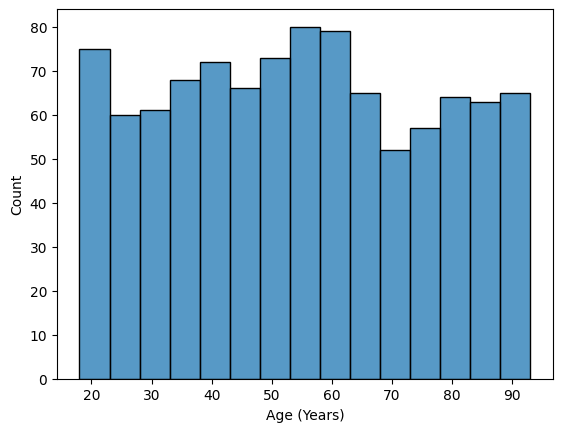

In [87]:
#question2 
#univariate plots, I chose histplot as it allows a lot of modifications and one can see your data distributed in several ways. you can set the bin size,the number of bin you want, stats, hue, etc

Age_plot1 =  sns.histplot(Originaldata, x = 'Age (Years)', binwidth = 5)
#Age_plot1.savefig('./Age_plot1.png')

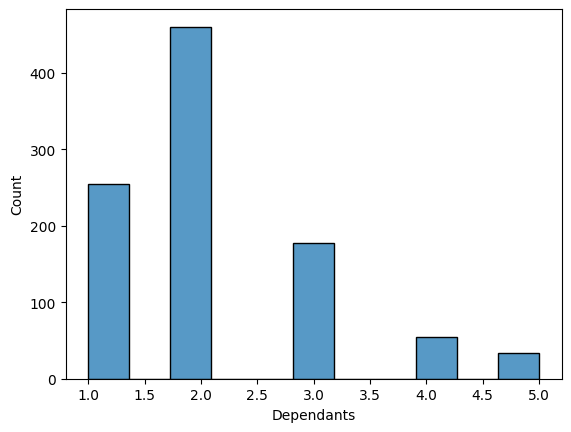

In [88]:
Dependents_plot2 =  sns.histplot(Originaldata, x = 'Dependants', fill = True)
#Dependents_plot2.savefig('./Dependents_plot2.png')

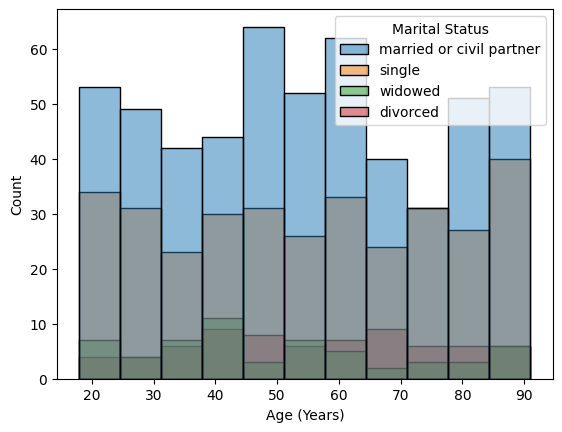

In [89]:
AgeandStatus_plot3 =  sns.histplot(Originaldata, x = 'Age (Years)', hue= 'Marital Status')

#AgeandStatus_plot3.savefig('./AgeandStatus_plot3.png')

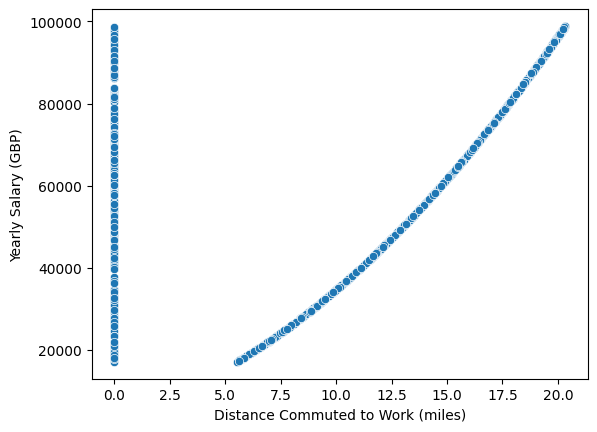

In [90]:
#question3 
#multivariate plots, I chose scatterplots so as to see the difference and arrangements unlike the ones used in class, and noticed scatterplots show a relationship between the variables used here 
Commuted_distance_plot1 = sns.scatterplot(Originaldata, x='Distance Commuted to Work (miles)', y='Yearly Salary (GBP)')

#Commuted_distance_plot1.savefig('./Commuted_distance_plot1.png')

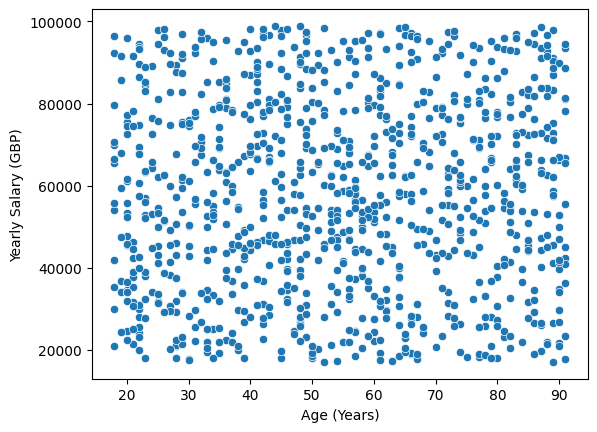

In [91]:
#multivariate plots, I chose scatterplots so as to see the difference and arrangements unlike the ones used in class, and noticed scatterplots shows no correlation to the variables used here
Age_and_salary_plot2 = sns.scatterplot(Originaldata, x='Age (Years)', y='Yearly Salary (GBP)')

#Age_and_salary_plot2.savefig('./Age_and_salary_plot2.png')

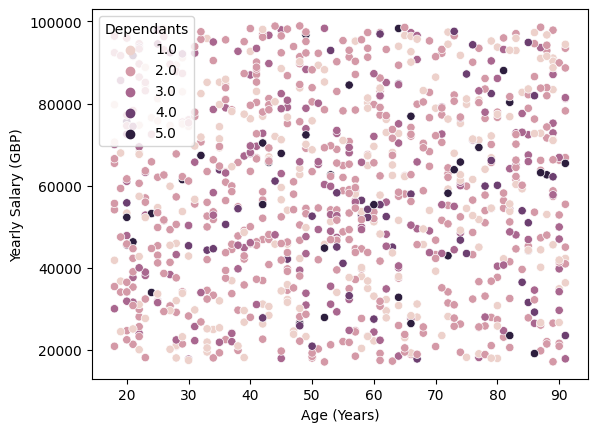

In [92]:
Age_and_salarydependents_plot3 = sns.scatterplot(Originaldata, x='Age (Years)', y='Yearly Salary (GBP)', hue = 'Dependants') 

#Age_and_salarydependents.savefig('./Age_and_salarydependents.png')

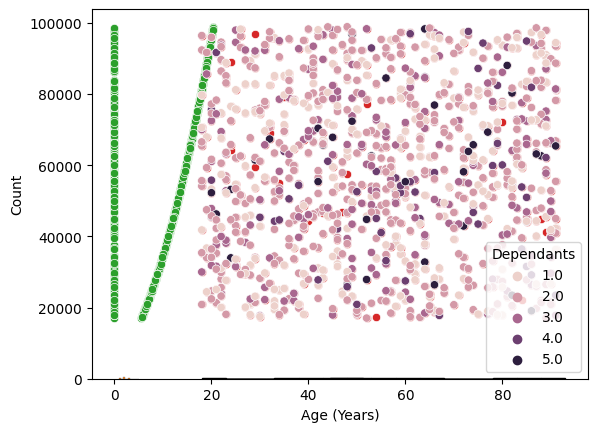

In [93]:
ACW_plots_figs = {}  #empty dictionary to save plots in

Age_plot1 =  sns.histplot(Originaldata, x = 'Age (Years)', binwidth = 5)
Dependents_plot2 =  sns.histplot(Originaldata, x = 'Dependants', fill = True)
AgeandStatus_plot3 =  sns.histplot(Originaldata, x = 'Age (Years)', hue= 'Marital Status')
Commuted_distance_plot1 = sns.scatterplot(Originaldata, x='Distance Commuted to Work (miles)', y='Yearly Salary (GBP)')
Age_and_salary_plot2 = sns.scatterplot(Originaldata, x='Age (Years)', y='Yearly Salary (GBP)')
Age_and_salarydependents_plot3 = sns.scatterplot(Originaldata, x='Age (Years)', y='Yearly Salary (GBP)', hue = 'Dependants')

ACW_plots_figs["./fig/Age_plot1.png"] = Age_plot1  #./fig is the default directory and folder created to save my plots
ACW_plots_figs["./fig/Dependents_plot2.png"] = Dependents_plot2
ACW_plots_figs["./fig/AgeandStatus_plot3.png"] = AgeandStatus_plot3
ACW_plots_figs['./fig/Commuted_distance_plot1.png'] = Commuted_distance_plot1
ACW_plots_figs['./fig/Age_and_salary_plot2.png'] = Age_and_salary_plot2
ACW_plots_figs['./fig/Age_and_salarydependents.png'] = Age_and_salarydependents_plot3

In [94]:
for item in ACW_plots_figs:
    ACW_plots_figs[item].figure.savefig(item)  #scatterplots uses .figure+.savefig to save items unlike relplot